# Project 2: Investigating Data From Around the World

## Introduction - Gapminder Data

> In the below analysis I'll be driving into some topics that sparked my interest. The data from Gapminder was very extensive with lots of datasets to be explored but I was able to narrow it down to a few topics.<br><br>
I would like to preface, since each csv file downloaded from Gapminder had varying levels of completion and avaiable years showing data I can't combine all my data into one dataset for all questions. Instead, I'll be analying, wrangling and cleaning the data to create specific dataframes for multiple research quesitons. Each questions will be broken into sections: question, explanation/information, cleaning/wrangling, anaylsis and synapsis.

## Project Introduction

> Throughout this project our questioning will revolve around 2 distinct variables: total murders per year and life expectancy. Part 1 (Q1 & Q2) help us understand the correlation between total murders and population. We will examine this topic further by representing the most dangerous countries by violent crime rates as a proportion to population size and population density. Part 2 (Q3 & Q4) we will understand how average life expectancy changes throughout history and if income per capita or health spend based of GDP has an affect towarded more prolonged life. Finally, I we will end the project with a final conclusion summarizing our findings and data limitations. 

**Here are the 4 research questions we are about to explore:**
1. Where are the most dangerous places to live?
2. How does population density effect violent murder rates?
3. Does average income per person effect life expectancy by country and which country had the greatest improvement in life expectancy?
4. How health spend effect life expectancy?

## Table of Contents
<ul>
<li><a href="#Datasets">Datasets Overview</a></li>
<li><a href="#Challenge">Largest Challenge</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#q1">Q1: Dangerous Living</a></li>
<li><a href="#q2">Q2: Murders vs Density</a></li>
<li><a href="#q3">Q3: Most Improved & Life Expectancy among Wealth</a></li>
<li><a href="#q4">Q4: Health Spends vs Life Expectancy</a></li>
<li><a href="#Conclusion">Final Conclusion</a></li>
</ul>

In [1]:
#import packages - I have used these imports at the start of most questions as well just in case

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

<a id='Datasets'></a>
## Dataset Overview
**NOTE:** All of these datasets are columnized by year and organized vertically by country. The data points correspond to a country for a one year period. Also, all datasets have variety of years and provided countries.

   >#### **What the data values represent:**
   **income.csv** - Income per person (GDP per capita, PPP inflation-adjusted) <br> 
   **life_exp.csv** - Average life expectancy in years <br>
   **murders.csv** - Total murders <br>
   **total_health_spend.csv** - Total health spend (% of total GDP) <br>
   **pop_density.csv** - Average number of people per square km of land in country <br>
   **populations_csv** - Total population <br>
   **gini.csv** - Gini coefficient per year (Higher number greater income inequality). Used for example <br>

In [2]:
#How I read in all datasets throughout the project
gini_df = pd.read_csv('gini.csv')
income_df = pd.read_csv('income.csv')
life_exp_df = pd.read_csv('life_exp.csv')
murders_df = pd.read_csv('murders.csv')
pop_density_df = pd.read_csv('pop_density.csv')
pop_df = pd.read_csv('population.csv')
health_df = pd.read_csv('total_health_spend.csv')


<a id='Challenge'></a>
## Largest Challenge in Project

> All the datasets from Gapminder organized their data using years as columns for each corresponging country and listed irrelevant future years in some dataframes. In order to anaylze the data properly over time I needed to consolidate all the year columns into one 'year' column and eliminate the irrelevant years. I did this by using drop function for irrelevant years and the melt function to organize my data as such: country, year, data1, data2, etc.

>Below are the corresponding steps needed to complete the melt and drop function. A method I used multiple times throuhgout the project.

In [3]:
#Understand data structure - gives me what years I need to drop
gini_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,...,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8
1,Albania,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,...,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0
2,Algeria,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,...,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6
3,Andorra,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
4,Angola,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,...,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6


In [4]:
gini_df.shape

(195, 242)

In [5]:
#Get rid of years above 2020 
col = range(2021, 2041)
for i in col:
    col_drop = str(i)
    gini_df.drop(col_drop, axis=1, inplace=True)

In [6]:
#Makes sure code ran properly and dataset is updated
gini_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,...,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8
1,Albania,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,...,29.3,29.1,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0
2,Algeria,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,...,28.2,27.9,27.7,27.6,27.6,27.6,27.6,27.6,27.6,27.6
3,Andorra,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
4,Angola,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,...,42.7,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6


#### For more information on [pd.melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html#pandas.DataFrame.melt)

In [7]:
#Reorganize my dataset to make it more easily anaylzed columns: (country, year, gini)
gini_df2 = pd.melt(gini_df, id_vars='country', var_name='year', value_name='gini')

#Check function ran properly
gini_df2.head()

,country,year,gini
0,Afghanistan,1800,30.5
1,Albania,1800,38.9
2,Algeria,1800,56.2
3,Andorra,1800,40.0
4,Angola,1800,57.2


In [8]:
gini_df2.shape

(43095, 3)

In [9]:
#Understand dataset
income_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Albania,667,667,667,667,667,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
2,Algeria,715,716,717,718,719,720,721,722,723,...,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73600,75100,76700,78300,79900,81500,83100,84800,86500,88300
4,Angola,618,620,623,626,628,631,634,637,640,...,6110,6230,6350,6480,6610,6750,6880,7020,7170,7310


In [10]:
#Drop years after 2020
col1 = range(2021, 2041)
for i in col1:
    col_drop = str(i)
    income_df.drop(col_drop, axis=1, inplace=True)
    
#Melt the columns to rows
income_df_updated  = pd.melt(income_df, id_vars='country', var_name='year', value_name='income')

In [11]:
#Check updates
income_df_updated.head()

,country,year,income
0,Afghanistan,1800,603
1,Albania,1800,667
2,Algeria,1800,715
3,Andorra,1800,1200
4,Angola,1800,618


<a id='q1'></a>
## Research Question 1: Where are the most dangerous places to live?

In [12]:
#Import packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [13]:
#Datasets needed:
murders_df = pd.read_csv('murders.csv')
pop_df = pd.read_csv('population.csv')

### Explanation
>I'm using total murders as the metric to decide how dangerous a country is. If there is a higher murder count in a give country than we can assume it is more dangerous. Of course, we can argue that if the population is greater than total murders may be higher in comparison to smaller countries. Therefore, I'll create an additional column using murders in proportion to the countries population.

### Understanding Data Layout

In [14]:
#Understand dataframe layout - we immediately see some irrelevant future years
murders_df.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,2070.00,2200.00,2380.00,2600.00,2830.00,3020.00,3160.00,3270.0,3350.00,...,4910.00,4960.00,4990.00,4940.00,5020.00,5190.00,5560.00,5820.00,6060.00,6270.00
1,Albania,160.00,182.00,201.00,221.00,239.00,267.00,295.00,327.0,338.00,...,82.70,77.50,67.50,68.40,68.50,68.50,68.70,68.90,69.20,69.50
2,Algeria,377.00,382.00,391.00,400.00,410.00,421.00,432.00,452.0,468.00,...,437.00,441.00,445.00,447.00,451.00,457.00,465.00,474.00,472.00,471.00
3,Andorra,0.48,0.51,0.54,0.55,0.55,0.53,0.51,0.5,0.49,...,0.52,0.52,0.53,0.54,0.54,0.54,0.55,0.55,0.55,0.55
4,Angola,527.00,532.00,543.00,569.00,598.00,608.00,582.00,582.0,667.00,...,904.00,933.00,958.00,978.00,990.00,1010.00,1030.00,1050.00,1080.00,1090.00


In [15]:
#Compare shapes to understand which dataframe we have to match to the other
murders_df.shape

(187, 28)

In [16]:
pop_df.shape

(195, 302)

We notice, murders dataset has a smaller range of years (27 vs 301) and listed countries (187 vs 195) than popluation. <br>
### Cleaning/Wrangling Data

**Steps:**
1. Remove irrelevant years from poplulation to match murders dataframe
2. Melt both dataframes for easier analysis
3. Merge dataframes only keeping similar countries
4. Check for missing or null values

In [17]:
#Drop years - need 1990 - 2016
col = np.r_[1800:1990 , 2017:2101]
for i in col:
    col_drop = str(i)
    pop_df.drop(col_drop, axis=1, inplace=True)

#Check for code completion
pop_df.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,12400000,13300000,14500000,15800000,17100000,18100000,18900000,19400000,19700000,...,27100000,27700000,28400000,29200000,30100000,31200000,32300000,33400000,34400000,35400000
1,Albania,3290000,3280000,3250000,3200000,3150000,3110000,3100000,3100000,3110000,...,3030000,3000000,2970000,2950000,2930000,2910000,2900000,2900000,2890000,2890000
2,Algeria,25800000,26400000,27000000,27600000,28200000,28800000,29300000,29700000,30200000,...,34200000,34700000,35300000,36000000,36700000,37400000,38100000,38900000,39700000,40600000
3,Andorra,54500,56700,58900,61000,62700,63900,64400,64300,64100,...,82700,83900,84500,84500,83700,82400,80800,79200,78000,77300
4,Angola,11800000,12200000,12700000,13100000,13500000,13900000,14400000,14900000,15400000,...,20900000,21700000,22500000,23400000,24200000,25100000,26000000,26900000,27900000,28800000


In [18]:
#Melt both datasets so we can join
murders_melt_df = pd.melt(murders_df, id_vars='country', var_name='year', value_name='total_murders')

pop_melt_df = pd.melt(pop_df, id_vars='country', var_name='year', value_name='total_pop')

In [19]:
#Check to make sure there are 3 columns
murders_melt_df.shape

(5049, 3)

In [20]:
pop_melt_df.shape

(5265, 3)

In [21]:
#Merge datasets and check for null values
violence_df = pd.merge(pop_melt_df, murders_melt_df, on=['country', 'year'], how='right')
violence_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5049 entries, 0 to 5048
Data columns (total 4 columns):
country          5049 non-null object
year             5049 non-null object
total_pop        5049 non-null int64
total_murders    5049 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 197.2+ KB


In [22]:
violence_df.head()

,country,year,total_pop,total_murders
0,Afghanistan,1990,12400000,2070.00
1,Albania,1990,3290000,160.00
2,Algeria,1990,25800000,377.00
3,Andorra,1990,54500,0.48
4,Angola,1990,11800000,527.00


According to the above info and head functions we can see that their are no null values and the dataframes are combine appropriately. <br>

### Analysis
In order to compare violent murders and poplulation throughout time I need to group our data points by country and find the mean murders value. This will organize the data allowing me to simply compare total murders based on country.<br><br>
**Note:** Normally, I might create different sections of time to see how murders and population has changed overtime in comparison to countries. Since we are only using a 26 year time span here I decided not to. We will see sectioned time eras later in project

In [23]:
#This is a global function used to eliminate scientific notation. Also allows multiple decimal places for proportions.
pd.set_option('display.float_format', lambda x: '%.5f' %x)

#Group based on country and find mean from 1990 - 2016
violence_mean_df = violence_df.groupby('country', as_index=False).mean().sort_values(by='total_murders',ascending=False)
#Top 10 countries with highest 
violence_mean_df.head(10)

,country,total_pop,total_murders
23,Brazil,180074074.07407,52555.55556
75,India,1107481481.48148,44740.74074
137,Russia,145555555.55556,36651.85185
35,China,1308888888.88889,35429.62963
36,Colombia,41111111.11111,21848.14815
151,South Africa,46681481.48148,20481.48148
178,United States,288814814.81481,19081.48148
107,Mexico,103488888.88889,16796.29630
132,Philippines,82848148.14815,11578.88889
182,Venezuela,25370370.37037,8288.88889


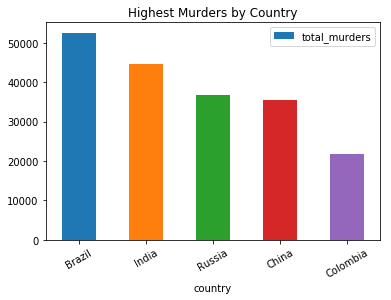

In [24]:
#Quick visual representation of countries with highest total murders
violence_mean_df.head().plot(x='country', y='total_murders', kind='bar', title='Highest Murders by Country', rot=30)

As mentioned before, popluation of the above countries is much higher than other countries. We can argue that of course there will be more murders merely because there is a greater popluation, all other things held constant.<br><br>

**How to Fix:** We create a column in table using murders in proportion to countries population (total murders / total population)

In [25]:
#Let's now take into consideration popluation
violence_mean_df['murders_per_capita'] = violence_mean_df['total_murders'] / violence_mean_df['total_pop']

#Check for proper code completion and sort to see top 10 coutries with highest murder rates per capita
violence_mean_df.sort_values(by='murders_per_capita', ascending=False).head(10)


,country,total_pop,total_murders,murders_per_capita
52,El Salvador,5925925.92593,3276.29630,0.00055
36,Colombia,41111111.11111,21848.14815,0.00053
151,South Africa,46681481.48148,20481.48148,0.00044
67,Guatemala,12658888.88889,4494.44444,0.00036
182,Venezuela,25370370.37037,8288.88889,0.00033
93,Lesotho,1964074.07407,595.92593,0.00030
23,Brazil,180074074.07407,52555.55556,0.00029
72,Honduras,7101481.48148,2064.81481,0.00029
137,Russia,145555555.55556,36651.85185,0.00025
160,Swaziland,1002222.22222,208.66667,0.00021


Text(0.5,1,'Highest Murders per Capita by Country')

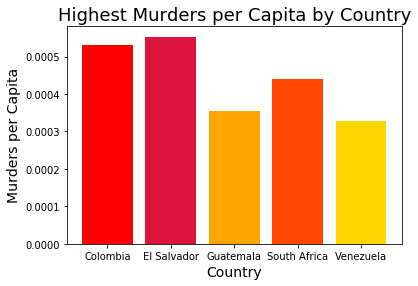

In [26]:
#Cleaner visual representation of data answering our initial question
x = violence_mean_df.sort_values(by='murders_per_capita', ascending=False)['country'].head()
y = violence_mean_df.sort_values(by='murders_per_capita', ascending=False)['murders_per_capita'].head()
plt.bar(x, y, color=['Crimson', 'Red', 'Orangered', 'Orange', 'Gold'])
plt.xlabel('Country', fontsize=14)
plt.ylabel('Murders per Capita', fontsize=14)
plt.title('Highest Murders per Capita by Country', fontsize=18)

### Q1 Synapsis
Based on the murders per capita and only taking into consideration the countries that we had data for in the above dataframes provided by Gapminder, Colombia, El Salvador, Guatemala, South Africa and Venezuela are the most dangerous places to live. Of course, this is only based on a few perameters and I'm sure there are many other factors that play into which country is most dangerous.<br>

**Possibly popluation density rather than total population?**


<a id='q2'></a>
## Research Question 2: How does population density effect violent murder rates?

This is a continuation of above question so we're able to use the already cleaned and wrangled data. All we need to do is clean/wrangle and then combine population density to total murders.

### Explanation
Density is average number of people in square km of land. The reason I'm interested in population density is what if a smaller country with a very large density has a correlation to total murders in the country. We can show correlation visually by using a scatter plot. If total murders increase as population density increases then there is a correlation between the variables. 

### Clean/Wrangling

In [27]:
# Continuation of above research question. Now lets add population density to the dataframe.
pop_density_df = pd.read_csv('pop_density.csv')
pop_density_df.head()

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,11.90000,12.00000,12.20000,12.30000,12.50000,12.70000,12.90000,13.10000,13.30000,...,117.00000,117.00000,117.00000,117.00000,116.00000,116.00000,116.00000,115.00000,115.00000,115.00000
1,Albania,46.10000,47.00000,48.00000,49.20000,50.50000,51.80000,53.30000,54.80000,56.30000,...,48.50000,47.50000,46.50000,45.50000,44.50000,43.50000,42.50000,41.60000,40.60000,39.70000
2,Algeria,3.73000,3.79000,3.86000,3.93000,4.01000,4.10000,4.20000,4.31000,4.41000,...,29.60000,29.60000,29.60000,29.60000,29.70000,29.70000,29.70000,29.70000,29.70000,29.70000
3,Andorra,13.20000,14.20000,15.40000,16.70000,18.20000,19.60000,21.20000,22.90000,24.70000,...,134.00000,134.00000,134.00000,134.00000,133.00000,133.00000,133.00000,133.00000,133.00000,133.00000
4,Angola,3.65000,3.70000,3.78000,3.87000,3.96000,4.05000,4.12000,4.19000,4.26000,...,135.00000,136.00000,138.00000,140.00000,142.00000,144.00000,146.00000,147.00000,149.00000,151.00000


In [28]:
#Delete none used years (1950 - 1989 & 2017 - 2100)
col = np.r_[1950:1990, 2017:2101]
for i in col:
    col_drop = str(i)
    pop_density_df.drop(col_drop, axis=1, inplace=True)
    
#Melt the columns to rows
pop_density_melt_df = pd.melt(pop_density_df, id_vars='country', var_name='year', value_name='density')


#Merge into violence_df
violence_density_df = pd.merge(violence_df, pop_density_melt_df, on=['country', 'year'], how='left')

#Adding murders_per_captia for fun of comparison
violence_density_df['murders_per_capita'] = violence_density_df['total_murders'] / violence_density_df['total_pop']

#Check for null values and shape - should be no null and 5049 items
violence_density_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5049 entries, 0 to 5048
Data columns (total 6 columns):
country               5049 non-null object
year                  5049 non-null object
total_pop             5049 non-null int64
total_murders         5049 non-null float64
density               5049 non-null float64
murders_per_capita    5049 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 276.1+ KB


In [29]:
#double check data layout
violence_density_df.head()

,country,year,total_pop,total_murders,density,murders_per_capita
0,Afghanistan,1990,12400000,2070.00000,19.00000,0.00017
1,Albania,1990,3290000,160.00000,120.00000,0.00005
2,Algeria,1990,25800000,377.00000,10.80000,0.00001
3,Andorra,1990,54500,0.48000,116.00000,0.00001
4,Angola,1990,11800000,527.00000,9.50000,0.00004


### Analysis

In [30]:
#Group data by country and find the mean over time. Again, we are only working 26 year span so we won't break into sections
violence_density_mean = violence_density_df.groupby('country', as_index=False).mean()

#Dataframe sorted by top density
violence_density_mean.sort_values(by='density', ascending=False).head()

,country,total_pop,total_murders,density,murders_per_capita
146,Singapore,4306296.29630,28.29630,6151.48148,0.00001
103,Malta,398962.96296,5.55333,1246.29630,0.00001
12,Bahrain,880666.66667,17.02593,1157.81481,0.00002
101,Maldives,317629.62963,3.14963,1059.59259,0.00001
13,Bangladesh,132814814.81481,4332.22222,1020.14815,0.00003


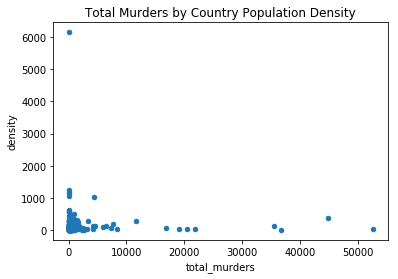

In [31]:
#Create a scatter plot to show comparison
violence_density_mean.sort_values(by='density', ascending=False).plot(x='total_murders', y='density', kind='scatter', title='Total Murders by Country Population Density')


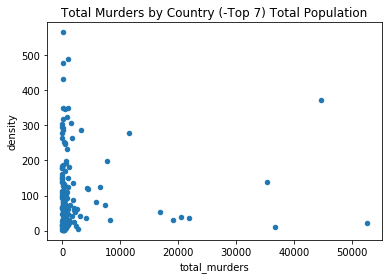

In [32]:
#I removed the top 7 densest countries becasue they were outliners and screwing the graph. Either way there is no correlation.
violence_density_mean.sort_values(by='density', ascending=False).tail(180).plot(x='total_murders', y='density', kind='scatter', title='Total Murders by Country (-Top 7) Total Population')

In order to be absolute certain, I will use the .corr function with the Pearson method the find the correlation coefficient between total_murders and density.

In [33]:
column_1 = violence_density_mean["total_murders"]
column_2 = violence_density_mean["density"]
correlation = column_1.corr(column_2)
print(correlation * 100)

-2.54509891184


### Q2 Synapsis

There is no correlation to murders and population density. Singapore is a great example. Singapore has the highest density for popluation but has one of the lowest violent murder rates per capita (see below - murder per capita 55X lower than Colombia and density of 166X higher).

Furthermore, there is only a -2.55% correlation between population density and total_murders between countries. Using Pearson's method coeffient we would need to see upwards of (-)70% correlation to make an argument for comparison.

Again, the population density is based on the square km area of the entire country. It would probably be a better comparison if we had data for top metropolitan areas in all countries as some countries have a ton of uninhabited area. 

In [34]:
violence_density_mean.query('country == "Singapore" | country == "Colombia"')

,country,total_pop,total_murders,density,murders_per_capita
36,Colombia,41111111.11111,21848.14815,37.03333,0.00055
146,Singapore,4306296.29630,28.29630,6151.48148,0.00001


<a id='q3'></a>
## Research Question 3: Does average income per person effect life expectancy by country and which country had the greatest improvement in life expectancy?

### Information

>**What is PPP?** <br>
PPP or Purchasing Power Parity is a way to compare the purchasing power from one conutry to another. This is also known as international currency and the unit being used in income.csv file. <br><br>
**How do we convert PPP to USD?**<br>
Well, we don't. The PPP is based off the purchasing power from other countries to the United States using the USD as a reference. Since we'd be comparing USD to USD the ratio from PPP to USD is 1/1. 

### Explanation
I was very curious as to how income effects the life expectancy in countries. Below I will explore this more but here is a bit of an overview as the dataframes are a bit more extensive.
> As I explored the dataframes I was able to put together a greater range of years to compare. Meaning that I'm not going to be able to take a mean over the entire time period as the data maybe skewed. **To fix this** I created 50 year segments and created another table to better understand life expectancy overtime.

Furthermore, I would like to preface that the years of life expectancy in eariler years was very low and makes me question the integrity of the data in many countries. We are going to assume for the sake of the assignment that the data from Gapminder is percise. 

In [35]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [36]:
#Datasets needed:
income_df = pd.read_csv('income.csv')
life_exp_df = pd.read_csv('life_exp.csv')

In [37]:
#Understand data layout
income_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Albania,667,667,667,667,667,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
2,Algeria,715,716,717,718,719,720,721,722,723,...,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73600,75100,76700,78300,79900,81500,83100,84800,86500,88300
4,Angola,618,620,623,626,628,631,634,637,640,...,6110,6230,6350,6480,6610,6750,6880,7020,7170,7310


In [38]:
life_exp_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.20000,28.20000,28.20000,28.20000,28.20000,28.20000,28.10000,28.10000,28.10000,...,76.50000,76.60000,76.70000,76.90000,77.00000,77.10000,77.30000,77.40000,77.50000,77.70000
1,Albania,35.40000,35.40000,35.40000,35.40000,35.40000,35.40000,35.40000,35.40000,35.40000,...,87.40000,87.50000,87.60000,87.70000,87.80000,87.90000,88.00000,88.10000,88.20000,88.30000
2,Algeria,28.80000,28.80000,28.80000,28.80000,28.80000,28.80000,28.80000,28.80000,28.80000,...,88.30000,88.40000,88.50000,88.60000,88.70000,88.80000,88.90000,89.00000,89.10000,89.20000
3,Andorra,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,Angola,27.00000,27.00000,27.00000,27.00000,27.00000,27.00000,27.00000,27.00000,27.00000,...,78.70000,78.90000,79.00000,79.10000,79.30000,79.40000,79.50000,79.70000,79.80000,79.90000


In [39]:
#Understand and compare shape
income_df.shape

(193, 242)

In [40]:
life_exp_df.shape

(187, 302)

### Clean and Wrangle
Steps are exactly the same as previous sections as dataframe layout identical

In [41]:
#Remove all years from both life_exp and income so they match. 

#Removing years for life_exp
col = np.r_[2021:2101]
for i in col:
    col_drop = str(i)
    life_exp_df.drop(col_drop, axis=1, inplace=True)
    
#Removing years for income
col = np.r_[2021:2041]
for i in col:
    col_drop = str(i)
    income_df.drop(col_drop, axis=1, inplace=True)

#Melt the colums into rows
income_melt_df = pd.melt(income_df, id_vars='country', var_name='year', value_name='income_per_capita')
life_exp_melt_df = pd.melt(life_exp_df, id_vars='country', var_name='year', value_name='exp_years_lived')

In [42]:
#Compare shape of the dataframes to make sure there are 3 columns
income_melt_df.shape

(42653, 3)

In [43]:
life_exp_melt_df.shape

(41327, 3)

In [44]:
#income has more countries so merge income to life_exp only keeping similar countries
life_income_df = pd.merge(income_melt_df, life_exp_melt_df, on=['country', 'year'], how='right')
life_income_df.shape

#In truth you could merge into smaller dataframe or do an inner merge here. 

(41327, 4)

In [45]:
#Check for null values
life_income_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41327 entries, 0 to 41326
Data columns (total 4 columns):
country              41327 non-null object
year                 41327 non-null object
income_per_capita    41327 non-null int64
exp_years_lived      40808 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.6+ MB


After checking for null or missing data we find that exp_years_lived has lots of missing values. Let's explore more to better understand where the missing values are coming from.

In [46]:
#Figure out where the missing data is in exp_years_lived.
missing_df = life_income_df.query('exp_years_lived == "NaN"')
missing_df.groupby('country', as_index=False).mean()

,country,income_per_capita,exp_years_lived
0,Andorra,5240.80925,nan
1,Dominica,1272.83237,nan
2,Marshall Islands,816.12139,nan


In [47]:
#Seems like its only in 3 different countries for practically all of their data points. Let's drop those countries
a = ['Andorra', 'Dominica', 'Marshall Islands']
for i in a:
    index_num = life_income_df[life_income_df['country'] == i].index
    life_income_df.drop(index_num, inplace=True)

#Check again for missing data
life_income_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40664 entries, 0 to 41326
Data columns (total 4 columns):
country              40664 non-null object
year                 40664 non-null object
income_per_capita    40664 non-null int64
exp_years_lived      40664 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.6+ MB


In [48]:
#Double check that countries have been dropped - dataframe should be empty
life_income_df.query('country == "Andorra" | country == "Dominica" | country == "Marshall Islands"')

,country,year,income_per_capita,exp_years_lived


### Analysis
In order to answer the questions properly, I need to break the years into smaller sections and combine into a seperate dataframe. I will do this by splitting into roughly 50 year segments and a more recent 20 year segment so I can find means in those time periods and see which countries have improved the most without worry to much about skewed data. 

In [49]:
#Used this for comparison when printing out the early - late dataframes
life_income_df.groupby('country', as_index=False).mean().head()

,country,income_per_capita,exp_years_lived
0,Afghanistan,1319.09955,35.30891
1,Albania,2386.40724,47.20498
2,Algeria,4254.33032,41.22534
3,Angola,2254.69231,35.07421
4,Antigua and Barbuda,5102.78281,47.06787


In [50]:
#First, I want to understand how life expectancy has changed overtime
x = 'exp_years_lived'

#Removing timeframes from the life_income_df so we can combine into another df later
early_df = life_income_df.query('year < "1850"').groupby('country', as_index=False)[x].mean()
mid_df = life_income_df.query('year >= "1850" & year < "1900"').groupby('country', as_index=False)[x].mean()
midlate_df = life_income_df.query('year >= "1900" & year < "1950"').groupby('country', as_index=False)[x].mean()
late_df = life_income_df.query('year >= "1950" & year < "2000"').groupby('country', as_index=False)[x].mean()
current_df = life_income_df.query('year >= "2000"').groupby('country', as_index=False)[x].mean()

#Check to make sure it worked
current_df.head()

,country,exp_years_lived
0,Afghanistan,59.57143
1,Albania,77.08571
2,Algeria,76.22857
3,Angola,59.35714
4,Antigua and Barbuda,76.34762


In [51]:
#Change column names so when combine we can tell them apart
early_df.rename(columns={x : 'early_yrs'}, inplace=True)
mid_df.rename(columns={x : 'mid_yrs'}, inplace=True)
midlate_df.rename(columns={x : 'midlate_yrs'}, inplace=True)
late_df.rename(columns={x : 'late_yrs'}, inplace=True)
current_df.rename(columns={x : 'current_yrs'}, inplace=True)

#Check changes
mid_df.head()

,country,mid_yrs
0,Afghanistan,28.09200
1,Albania,35.40000
2,Algeria,27.86400
3,Angola,27.58800
4,Antigua and Barbuda,33.58200


In [52]:
#Combine the time sections for average years lived for all countries
from functools import reduce
data_frames = [early_df, mid_df, midlate_df, late_df, current_df]
merge_df = reduce(lambda  left,right: pd.merge(left,right,on=['country'],
                                            how='outer'), data_frames)
#Check merge
merge_df.head()

,country,early_yrs,mid_yrs,midlate_yrs,late_yrs,current_yrs
0,Afghanistan,27.96000,28.09200,30.47340,44.52000,59.57143
1,Albania,35.40000,35.40000,37.92800,67.54200,77.08571
2,Algeria,28.62400,27.86400,32.69600,61.01600,76.22857
3,Angola,27.00000,27.58800,30.59200,44.91800,59.35714
4,Antigua and Barbuda,33.50000,33.58200,40.52600,68.36600,76.34762


In [53]:
#Add an improvement column by subtracting early from late and sort appropriately.
merge_df['improvement'] = merge_df['current_yrs'] - merge_df['early_yrs']
merge_df.sort_values(by='improvement', ascending=False).head(10)

,country,early_yrs,mid_yrs,midlate_yrs,late_yrs,current_yrs,improvement
86,Kuwait,26.00000,26.10800,29.19400,68.86000,81.11905,55.11905
149,South Korea,25.80000,25.83800,33.19800,62.68600,80.32857,54.52857
151,Spain,29.50000,30.32600,46.00600,72.63600,81.63810,52.13810
79,Italy,29.70000,33.53000,49.98800,72.78600,81.79524,52.09524
116,Nicaragua,25.40000,25.54000,30.17000,59.62600,77.10476,51.70476
101,Malta,28.70000,32.26000,52.88000,71.52400,80.21429,51.51429
143,Singapore,31.84400,34.04600,39.47400,70.45800,82.74286,50.89886
75,Iran,25.60000,25.80200,28.10800,59.58800,75.43810,49.83810
168,Tunisia,27.06600,28.47000,32.32200,60.18000,76.80952,49.74352
78,Israel,32.00000,32.00000,36.37800,72.49800,81.29524,49.29524


Kuwait, South Korea, Spain, Italy and Nicaragua have the greatest improvement in life expectancy in the past 220 years based on the data given by Gapminder. Again, I used time segments to stear clear of recently or earlier skewed data. I believe this is a more appropriate representation of improvement in life expectation.

### Analysis Cont.

Next, we need to tackle how income per person effects life expectancy. As discussed above, the figures have already been converted/are represented in USD. And again, income in average per person in the given country.




In [54]:
life_income_df.head()

,country,year,income_per_capita,exp_years_lived
0,Afghanistan,1800,603,28.20000
1,Albania,1800,667,35.40000
2,Algeria,1800,715,28.80000
4,Angola,1800,618,27.00000
5,Antigua and Barbuda,1800,757,33.50000


Below are scatter plots of expected years to live compared to income per person organized by country. The data values are determined based on averages throughout the time segment.


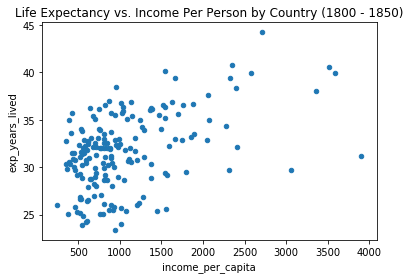

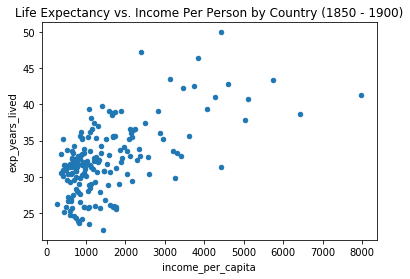

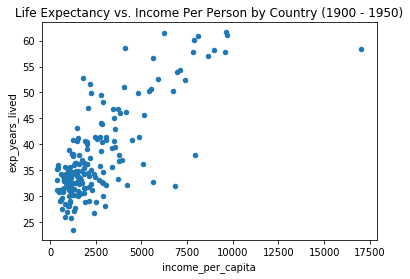

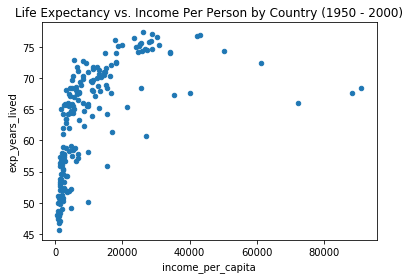

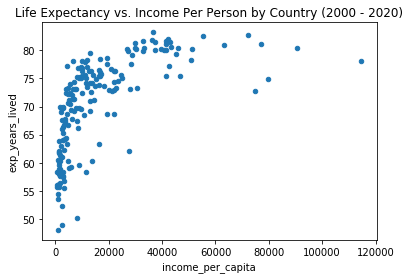

In [55]:
#Create the timed segments so we can merge into one table.

early_df = life_income_df.query('year < "1850"').groupby('country', as_index=False).mean()
mid_df = life_income_df.query('year >= "1850" & year < "1900"').groupby('country', as_index=False).mean()
midlate_df = life_income_df.query('year >= "1900" & year < "1950"').groupby('country', as_index=False).mean()
late_df = life_income_df.query('year >= "1950"').groupby('country', as_index=False).mean()
current_df = life_income_df.query('year >= "2000"').groupby('country', as_index=False).mean()


#Create some scatter plots so we can compare different timeframes
print('Below are scatter plots of expected years to live compared to income per person organized by country. The data values are determined based on averages throughout the time segment.')
early_df.plot(x="income_per_capita", y="exp_years_lived", kind='scatter', title='Life Expectancy vs. Income Per Person by Country (1800 - 1850)')
mid_df.plot(x="income_per_capita", y="exp_years_lived", kind='scatter', title='Life Expectancy vs. Income Per Person by Country (1850 - 1900)')
midlate_df.plot(x="income_per_capita", y="exp_years_lived", kind='scatter', title='Life Expectancy vs. Income Per Person by Country (1900 - 1950)')
late_df.plot(x="income_per_capita", y="exp_years_lived", kind='scatter', title='Life Expectancy vs. Income Per Person by Country (1950 - 2000)')
current_df.plot(x="income_per_capita", y="exp_years_lived", kind='scatter', title='Life Expectancy vs. Income Per Person by Country (2000 - 2020)')


After scanning the scatter plots it almost seems like the correlation between and income per person and longer life expectancy has become less and less correlated. To be sure lets use the Pearson correlation coefficient again on each timeline.

In [56]:
#Create an array of data for correlation coefficients
#NOTE: I had to give dataframes below names so I could append the names appropriately in the loop
early_df.name = 'early'
mid_df.name = 'mid'
midlate_df.name = 'midlate'
late_df.name = 'late'
current_df.name = 'current'
df = [early_df, mid_df, midlate_df, late_df, current_df]
data = []
for i in df:
    column_1 = i["income_per_capita"]
    column_2 = i["exp_years_lived"]
    correlation = (column_1.corr(column_2)) * 100
    data.append([i.name, correlation])

#Use the array of data to create a new data frame to anaylze.
corr_df = pd.DataFrame(data, columns = ['Era', 'Coefficient'])
corr_df


,Era,Coefficient
0,early,45.96669
1,mid,58.32707
2,midlate,75.68726
3,late,54.55680
4,current,61.56485


### Q3 Synapsis
Based on our above analysis it seems that the most improved countries on life expectancy are Kuwait, South Korea, Spain, Italy and Nicaragua.

As for the correlation between life expectancy the average income per person, there seems to be little correlation but not enough to make a stronger agrument. 

Although it doesn't seem like income has a strong correlation or effect on life expectancy within countries I wonder if there are of dependent variable that have an effect. Maybe health spend?

<a id='q4'></a>
## Research Question 4: How health spend effect life expectancy?

### Explanation
I was unlikely in the comparison between income per person and life expectancy within a country but it would be interesting to see what the correlation between health spend and life expectancy looks like. Also, the health spend is the % of total GDP which I think is a good metric because we will be looking at proportions rather than hard numbers per country.

As I'm performing many of the same functions I'm going to follow the same basic order within this question and possibly use dataframes from the past question.

In [57]:
#Libraries and dataset:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

health_df = pd.read_csv('total_health_spend.csv')
life_exp_df = pd.read_csv('life_exp.csv')

### Understanding Data Layout
Based on below functions around the data it is layed out identical to all other Gapminder data. We will need to remove irrelevant years, melt the data and combine reletive dataframes.

In [58]:
#Unfortunately health spend as % of total GDP only goes from 1995 to 2010
health_df.head()

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,nan,nan,nan,nan,nan,nan,nan,0.05720,0.06820,0.06360,0.06630,0.06770,0.07300,0.06980,0.07580,0.07580
1,Albania,0.02560,0.04040,0.04810,0.05340,0.05830,0.06350,0.06040,0.06280,0.06160,0.06880,0.06840,0.06730,0.06880,0.06750,0.06880,0.06550
2,Algeria,0.04170,0.03790,0.04060,0.04060,0.03870,0.03490,0.03840,0.03870,0.03740,0.03380,0.03060,0.03130,0.03530,0.03730,0.04580,0.04170
3,Andorra,0.07640,0.08030,0.08030,0.09850,0.07350,0.07580,0.06790,0.07040,0.07120,0.07110,0.07220,0.07440,0.07550,0.07540,0.07520,0.07520
4,Angola,0.03790,0.02170,0.02260,0.01850,0.01940,0.02410,0.03450,0.02360,0.02640,0.02090,0.01960,0.02420,0.02520,0.03190,0.04950,0.02850


In [59]:
#remove years for life_exp to match health spend (1996 - 2010)
col = np.r_[1800:1996, 2011:2101]
for i in col:
    col_drop = str(i)
    life_exp_df.drop(col_drop, axis=1, inplace=True)

#melt the colums into rows
health_melt_df = pd.melt(health_df, id_vars='country', var_name='year', value_name='health_spend')
life_exp_melt_df = pd.melt(life_exp_df, id_vars='country', var_name='year', value_name='exp_years_lived')

In [60]:
#Make sure code ran successfully
life_exp_melt_df.head()

,country,year,exp_years_lived
0,Afghanistan,1996,53.80000
1,Albania,1996,74.40000
2,Algeria,1996,73.30000
3,Andorra,1996,80.00000
4,Angola,1996,50.10000


In [61]:
#Double check to make sure there are 3 rows and understand more fully how to merge the dataframes.
health_melt_df.shape

(3040, 3)

In [62]:
life_exp_melt_df.shape

(2805, 3)

In [63]:
life_health_df = pd.merge(health_melt_df, life_exp_melt_df, on=['country', 'year'], how='inner')
life_health_df.shape

(2760, 4)

In [64]:
#inspect the data to further check
life_health_df.head()

,country,year,health_spend,exp_years_lived
0,Afghanistan,1996,nan,53.80000
1,Albania,1996,0.04040,74.40000
2,Algeria,1996,0.03790,73.30000
3,Andorra,1996,0.08030,80.00000
4,Angola,1996,0.02170,50.10000


In [65]:
#Check for missing data
life_health_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2760 entries, 0 to 2759
Data columns (total 4 columns):
country            2760 non-null object
year               2760 non-null object
health_spend       2731 non-null float64
exp_years_lived    2760 non-null float64
dtypes: float64(2), object(2)
memory usage: 107.8+ KB


**We are missing some health_spend values!**<br>
Next, we will have to see where the data is missing from and determine how to fix

In [66]:
#understand data so I can clean
life_health_df.query('health_spend == "NaN"')

,country,year,health_spend,exp_years_lived
0,Afghanistan,1996,nan,53.80000
94,Liberia,1996,nan,48.90000
184,Afghanistan,1997,nan,53.70000
278,Liberia,1997,nan,51.90000
368,Afghanistan,1998,nan,52.80000
552,Afghanistan,1999,nan,54.40000
736,Afghanistan,2000,nan,54.60000
920,Afghanistan,2001,nan,54.80000
1252,Somalia,2002,nan,53.30000
1287,Zimbabwe,2002,nan,45.60000


In [67]:
#Zimbabwe, Somalia and Afghanistan have to many data points missing so drop them
a = ['Zimbabwe', 'Somalia', 'Afghanistan']
for i in a:
    index_nums = life_health_df[life_health_df['country'] == i].index
    life_health_df.drop(index_nums, inplace=True)

#Check to see if worked
life_health_df.query('health_spend == "NaN"')

,country,year,health_spend,exp_years_lived
94,Liberia,1996,nan,48.90000
278,Liberia,1997,nan,51.90000
2648,Honduras,2010,nan,72.80000
2683,Mexico,2010,nan,75.20000
2695,Nicaragua,2010,nan,77.60000


In [68]:
#For all other countries I'll find mean and replace the corresponding row values with specified country mean

#Find mean for all the countries health spend
liberia_mean = life_health_df.query('country == "Liberia"')['health_spend'].mean()
honduras_mean = life_health_df.query('country == "Honduras"')['health_spend'].mean()
mexico_mean = life_health_df.query('country == "Mexico"')['health_spend'].mean()
nicaragua_mean = life_health_df.query('country == "Nicaragua"')['health_spend'].mean()

#replace the NaN inputs with the mean values with the specific rows
life_health_df['health_spend'] = np.where((life_health_df['country'] == 'Liberia') & (life_health_df['year'] == '1996'), liberia_mean, life_health_df['health_spend'])
life_health_df['health_spend'] = np.where((life_health_df['country'] == 'Liberia') & (life_health_df['year'] == '1997'), liberia_mean, life_health_df['health_spend'])
life_health_df['health_spend'] = np.where((life_health_df['country'] == 'Honduras') & (life_health_df['year'] == '2010'), honduras_mean, life_health_df['health_spend'])
life_health_df['health_spend'] = np.where((life_health_df['country'] == 'Mexico') & (life_health_df['year'] == '2010'), mexico_mean, life_health_df['health_spend'])
life_health_df['health_spend'] = np.where((life_health_df['country'] == 'Nicaragua') & (life_health_df['year'] == '2010'), nicaragua_mean, life_health_df['health_spend'])


In [69]:
#check to make sure data is cleaned
life_health_df.info()
life_health_df.query('health_spend == 0')

#Make sure Honduras has every year listed (1996 - 2010)
life_health_df.query('country == "Honduras"')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2715 entries, 1 to 2758
Data columns (total 4 columns):
country            2715 non-null object
year               2715 non-null object
health_spend       2715 non-null float64
exp_years_lived    2715 non-null float64
dtypes: float64(2), object(2)
memory usage: 106.1+ KB


,country,year,health_spend,exp_years_lived
72,Honduras,1996,0.04960,69.40000
256,Honduras,1997,0.04880,69.70000
440,Honduras,1998,0.05630,63.50000
624,Honduras,1999,0.05700,70.10000
808,Honduras,2000,0.05380,70.40000
992,Honduras,2001,0.05450,70.70000
1176,Honduras,2002,0.06070,71.00000
1360,Honduras,2003,0.06400,71.20000
1544,Honduras,2004,0.06470,71.40000
1728,Honduras,2005,0.05830,71.70000


### Analysis
For here it is very easy compared to some of our other questions. Since we are only working with a small segment of time we can going to take the average across entire time period and compare the variables in a scatter plot to better spot a correlation.

Furthermore, I will find the correlation coefficient to compare our earlier correlation of income per person to life expectancy to our new correlation using health spend. 

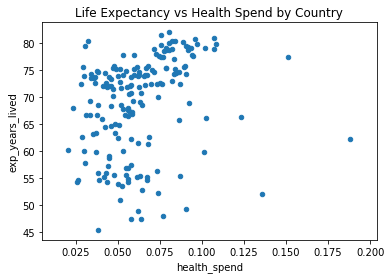

In [70]:
#Create scatter plot using mean values for countries
life_health_df.groupby('country', as_index=False).mean().plot(x='health_spend', y='exp_years_lived', kind='scatter', 
                                                              title='Life Expectancy vs Health Spend by Country')

In [71]:
#Pearson Correlation Coefficient - higher the coefficient the more correlated the data
column_1 = life_health_df["health_spend"]
column_2 = life_health_df["exp_years_lived"]
correlation = column_1.corr(column_2)
print(correlation * 100)

24.5121296231


### Q4 Synapsis
It is fair to say that there is no correlation between health spend (% of GDP) and life expectancy by country. There is only about a 24.5% correlation between the two and we can't argue for a correlation until at least after 70%. 

<a id='Conclusion'></a>
## Project Final Conclusion

> **Results:**
1. When comparing violent crimes (total murders) in proportion to countries population, Colombia, El Salvador, Guatemala, South Africa and Venezuela are the 5 countries with the highest statistical probability of violent attacks per person. 
2. There is a -2.55% correlation between population density per country and total murders. Based on the data parameters, there is no correlation and population density dsoesn't effect total murders by country.
3. The top 5 most improved countries from early 1800's to post-2000 for average years lived per person are Kuwait, South Korea, Spain, Italy and Nicaragua.
4. The correlation between income per capita and life expectancy by country ranges from 45% to 75% from 1800 - 2020. As the correlations are intermittant throughout history and not substantial enough for a strong argument it's safe to say there is little to no correlation. 
5. There is only a 24.5% correlation between health spend as a percentage of GDP and average life expectancy in years by country. Based on statistics, there is no correlation between budgetted health spend and life expectancy. 

>**Data Limitations:**
1. We are limited to the data provided by Gapminder which does not include all countires and has no murder/population data on individual metropolitan areas which would have helped narrow down most dangerous 'place' to live.
2. Density was measured for entire area (sq km) of country which would skew that data for countries with more uninhabited land. This would be a more useful finding if it was narrowed down to cities.
3. For both total murders and health spend data files, we were limited to under 30 years of availabe data points and more limited on listed countries. Although this may be substantial enough to make a claim it would be as strong as other dataframes and results provided.
4. Global data provided by many diffing resources usually results in differing data integrity and can always be challenged and questioned. 


In [72]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0